<a href="https://colab.research.google.com/github/girishdatsts/FastAi_Colabs/blob/girishdatsts_Intro2Fast_ai_rf1/NN_Collaborative_filtering_model_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from fastai.collab import CollabDataBunch, collab_learner
from fastai import *

In [6]:
!ls cd sample_data\

ls: cannot access 'cd': No such file or directory
sample_data:
anscombe.json		      mnist_test.csv	     u.data
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
cols = ['User ID','Movie ID','Rating','Timestamp']

In [0]:
ratings_df = pd.read_csv('sample_data/u.data', delimiter='\t', header=None, names=cols)

In [9]:
ratings_df.sample(5)

,User ID,Movie ID,Rating,Timestamp
78692,804,576,4,879445355
89438,862,61,5,879304244
54052,709,27,3,879848590
47988,524,405,2,884627065
13566,386,50,4,877654961


In [0]:
data = CollabDataBunch.from_df(ratings_df, valid_pct=0.2)

In [11]:
data.show_batch()

User ID,Movie ID,target
336,67,4.0
312,615,4.0
566,483,4.0
867,603,5.0
894,30,4.0


- #### *We use the **collab_learner method from fastai** to create a neural collaborative filtering model*

In [0]:
learn = collab_learner(data, n_factors=40, y_range=[0,5.5], wd=.1)

### Training the model
> -  The learner uses the** mean squared error loss function** to evaluate the predictions of the model, 
and the **Adam optimizer to adjust the parameters** (vectors and biases) using gradient descent. 

> - Before we train the model, we use the **learning rate finder** to select a good learning for the optimizer.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
CPU times: user 654 ms, sys: 183 ms, total: 837 ms
Wall time: 1.06 s


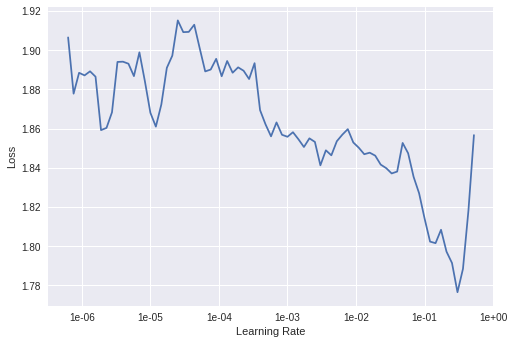

In [14]:
%time learn.lr_find()
learn.recorder.plot(skip_end=15)

- Upon inspection of the **graph**, we can see that the **decrease in loss starts to decrease when the learning rate is around 0.01**. We can choose this as our learning rate, and train for 5 epochs, while annealing the learning rate using the **1-cycle policy**, which leads to faster convergence.

In [15]:
%time learn.fit_one_cycle(5, 0.01)

epoch,train_loss,valid_loss,time
0,1.000066,0.960296,00:13
1,0.908684,0.901659,00:13
2,0.802804,0.848568,00:13
3,0.620773,0.821438,00:13
4,0.447666,0.822403,00:13


CPU times: user 41.4 s, sys: 8.48 s, total: 49.9 s
Wall time: 1min 5s


- ### Looking at some predictions

In [16]:
(users, items), ratings = next(iter(data.valid_dl))
%time preds = learn.model(users, items)

CPU times: user 1.05 ms, sys: 5 µs, total: 1.06 ms
Wall time: 1.07 ms


In [17]:
print('Real\tPred\tDifference')
for p in list(zip(ratings, preds))[:16]:
    print('{}\t{:.1f}\t{:.1f}'.format(p[0],p[1],p[1]-p[0]))

Real	Pred	Difference
5.0	4.2	-0.8
2.0	3.3	1.3
5.0	4.4	-0.6
4.0	3.7	-0.3
4.0	3.6	-0.4
3.0	3.5	0.5
4.0	4.1	0.1
4.0	3.7	-0.3
5.0	4.7	-0.3
3.0	3.2	0.2
4.0	3.6	-0.4
3.0	3.3	0.3
3.0	3.2	0.2
2.0	2.7	0.7
4.0	4.0	0.0
5.0	3.6	-1.4


- ### Save and commit::
> - save and commit our work using the **jovian library.**

In [0]:
# pip install jovian

In [0]:
import jovian

In [24]:
jovian.commit()

[jovian] Error: Failed to detect Juptyer notebook. Skipping..


- ### following are some resources, helps to  to dive deeper into the topic:

* [Lesson 4](https://course.fast.ai/videos/?lesson=4) of FastAI's "Practical Deep Learning for Coders" course

* [Paper](https://arxiv.org/abs/1708.05031) introducing neural collaborative filtering

* [PyTorch: Zero to GANs](https://medium.com/jovian-io/pytorch-basics-tensors-and-gradients-eb2f6e8a6eee)  - tutorial series covering the basics of PyTorch and neural networks